In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('spam_data.csv', encoding='latin-1')
data.columns=['class','text']
data = data.dropna()

In [8]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Labelize the column
data['label'] = label_encoder.fit_transform(data['class'])

In [9]:
data['class'].value_counts()

ham     4824
spam     747
Name: class, dtype: int64

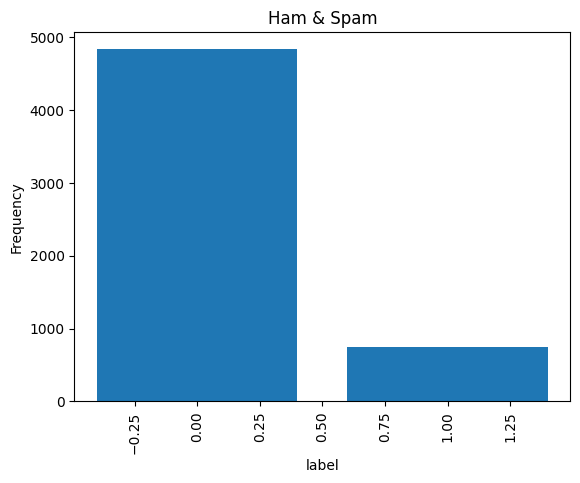

In [10]:
import matplotlib.pyplot as plt
column_name = 'label'
value_counts1 = data[column_name].value_counts()
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Ham & Spam')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
target_column = 'label'  # Replace with the name of the target column
X = data.drop(target_column, axis=1)  # Features (all columns except the target column)
y = data[target_column]  # Target variable (the column you want to balance)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X['text'])  # Replace 'text_column' with the actual name of the text column

Training and testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

Applying Logistic Regression

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
predictions = lr.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       0.99      0.71      0.82       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



***  AFTER SMOTH APPLIED***

In [16]:
oversampler = SMOTE(random_state=42)

In [17]:
X_oversampled, y_oversampled = oversampler.fit_resample(X_tfidf, y)

In [18]:
X_oversampled_df = pd.DataFrame(X_oversampled.toarray(), columns=tfidf.get_feature_names_out())

In [19]:
lr1 = LogisticRegression()
lr1.fit(X_oversampled, y_oversampled.ravel())
predictions = lr1.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1448
           1       0.98      0.97      0.98       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.99      1672
weighted avg       0.99      0.99      0.99      1672



In [20]:
balanced_data = pd.concat([X_oversampled_df, pd.DataFrame(y_oversampled, columns=[target_column])], axis=1)
balanced_data.to_csv('balanced_dataset.csv', index=False)

In [21]:
# Load the balanced dataset
balanced_data = pd.read_csv('balanced_dataset.csv')

In [22]:
balanced_data['label'].value_counts()

0    4824
1    4824
Name: label, dtype: int64

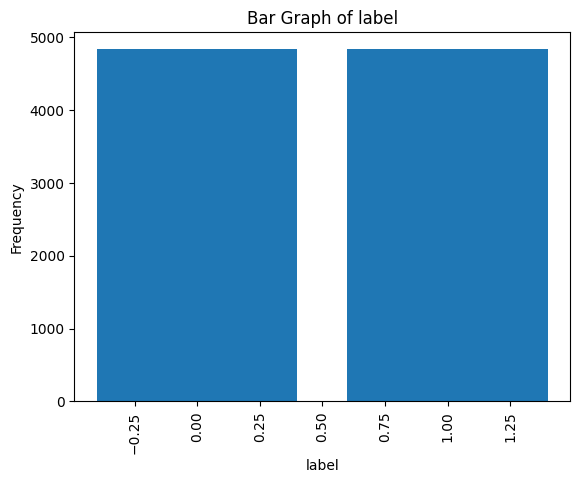

In [23]:
import matplotlib.pyplot as plt
column_name = 'label'
value_counts = balanced_data[column_name].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Bar Graph of ' + column_name)
plt.xticks(rotation='vertical')
plt.show()